In [314]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import SpectralClustering

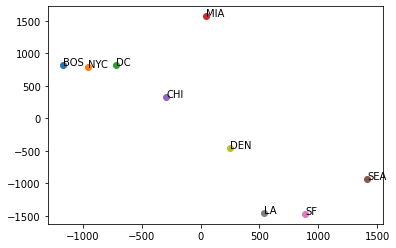

In [414]:
def get_distance_matrix():
    distance_matrix = [[], [], [], [], [], [], [], [], []]
    distance_matrix[0] = [0, 206, 429, 1504, 963, 2976, 3095, 2979, 1949]
    distance_matrix[1] = [206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771]
    distance_matrix[2] = [429, 233, 0, 1075, 671, 2684, 2799, 2631, 1616]
    distance_matrix[3] = [1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037]
    distance_matrix[4] = [963, 802, 671, 1329, 0, 2013, 2142, 2054, 996]
    distance_matrix[5] = [2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307]
    distance_matrix[6] = [3095, 2934, 2799, 3053, 2142, 808, 0, 379, 1235]
    distance_matrix[7] = [2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059]
    distance_matrix[8] = [1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0]
    return distance_matrix


def get_initial_coordinates():
    return np.random.standard_normal((9, 2))


def update_coordinates(x, lr, gradiants):
    return x - (lr * gradiants)


def compute_gradiant(x, distance_matrix, i):
    gradiant = 0
    for j in range(0, 9):
        if i != j:
            norm = np.linalg.norm(x[i] - x[j])
            vector_diff = x[i] - x[j]
            gradiant += (norm - distance_matrix[i][j]) * (vector_diff / norm)
    return 4 * gradiant


def compute_coordinates(number_of_iterations, lr):
    x = get_initial_coordinates()
    distance_matrix = get_distance_matrix()

    for i in range(number_of_iterations):
        gradiants = np.array([compute_gradiant(x, distance_matrix, j) for j in range(0, 9)])
        x = update_coordinates(x, lr, gradiants)
    return x


def plot_cities(x, cities):
    fig, ax = plt.subplots()
    for i in range(0, 9):
        ax.scatter(x[i][0], x[i][1])
    for i, city in enumerate(cities):
        ax.annotate(city, (x[i][0], x[i][1]))
    plt.show()


lr = 0.005
number_of_iterations = 1000
cities = ['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']

x = compute_coordinates(number_of_iterations, lr)
plot_cities(x, cities)

In [291]:
def update_clusters(data, assignments, prev_clusters):
  assigned_clusters = {}
  for index, data_point in enumerate(data):
    assignment = assignments[index]
    if assignment not in assigned_clusters.keys():
      assigned_clusters[assignment] = []
    assigned_clusters[assignment].append(data_point)
  
  new_centers = []
  for key in assigned_clusters.keys():
    new_centers.append(np.mean(assigned_clusters[key], axis=0))
  return new_centers

def get_distance(x, y):
  return np.linalg.norm(x-y)

def find_cluster(x, clusters):
  distance = [get_distance(x, cluster) for cluster in clusters]
  return np.argmin(distance)

def get_clusters(data, num_of_cluster):
  dim = data.shape[1]
  current_clusters = np.random.standard_normal((num_of_cluster, dim))
  prev_clusters = np.zeros((num_of_cluster, dim))
  while(not np.array_equal(current_clusters, prev_clusters)):
    prev_clusters = current_clusters
    assignements = [find_cluster(x, prev_clusters) for x in data]
    current_clusters = update_clusters(data, assignements, prev_clusters)
  return assignements

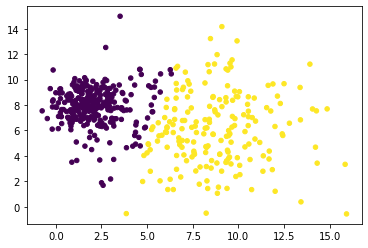

In [437]:
X, y = make_blobs(n_samples=500, centers=2, random_state=20, cluster_std=[1.0, 3.0])
assignment = get_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1],s=20, c=assignment);

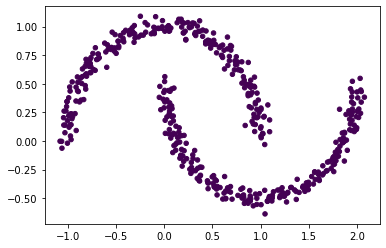

In [411]:
X, y = make_moons(n_samples=500, noise=0.05)
assignment = get_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1],s=20, c=assignment);


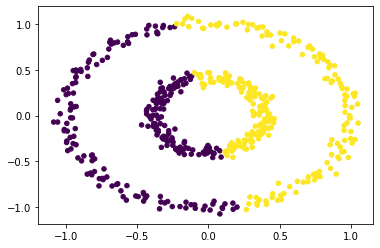

In [399]:
X, y = make_circles(factor=0.4, noise=0.04, n_samples=500)
assignment = get_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1],s=20, c=assignment);
